I am trying to analyze data thru diff views to get a clue which features may be impacting target. My intenetion is to keep things simple and easily comprehendable. I myself get lost sometimes in good kernels which are bit low on structure part.  I have tried to keep it structured and scalable for new features and models. 

-  [Import and Read](#LibLink)
-  [Basic EDA](#EDALink)
-  [Functions](#FuncLink)
-  [Plotting](#PlotLink)
-  [Corr and Bin](#CorLink)
-  [Features](#FeatLink)
-  [Model](#ModLink)

<div id="LibLink">
**Import libraries**
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from scipy.stats import rankdata
import lightgbm as lgb
from sklearn import metrics
import gc
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools
from sklearn import metrics
from scipy.stats import norm, rankdata

pd.set_option('display.max_columns', 200)
# below is to have multiple outputs from same Jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

Read files 

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

<div id="EDALink">
 **Basic EDA**
 </div>

Number of rows and columns in Dataset

In [3]:
print("Train Shape\n")
train_df.shape
print("Test Shape\n")
test_df.shape

Train Shape



(200000, 202)

Test Shape



(200000, 201)

Basic statistics for datasets

In [4]:
print("Train Describe\n")
train_df.describe() 
print("Test Describe\n")
test_df.describe()

Train Describe



target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

Test Describe



var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9         var_10         var_11  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.277135       7.569407       0.371335      -3.268551   
std         3.333375       1.231865       5.508661       5.961443   
min        -9.956000       4.243300     -22.672400     -25.811800   
25%        -2.303900       6.623800      -3.626000      -7.522000   
50%         0.372000       7.632000       0.491850      -3.314950   
75%         2.930025       8.584825       4.362400       0.832525   
max         9.665500      11.003600      20.214500      16.771300   

              var_12         var_13         var_14         var_15  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.022662       8.540872       7.532703      14.573704   
std         0.190071       4.628712       2.255257       0.411592   
min        13.424500      -4.741300       0.670300      13.203400   
25%        13.891000       5.073375       5.769500      14.262400   
50%        14.024600       8.617400       7.496950      14.572700   
75%        14.162900      12.270900       9.271125      14.875600   
max        14.682000      21.605100      14.723100      15.798000   

              var_16        var_17         var_18         var_19  \
count  200000.000000  200000.00000  200000.000000  200000.000000   
mean        9.321669      -5.70445      15.265776      12.456675   
std         2.544860       6.74646       7.846983       7.989812   
min         0.314300     -28.90690     -11.324200     -12.699400   
25%         7.454400     -10.49790       9.237700       6.322300   
50%         9.228900      -5.69820      15.203200      12.484250   
75%        11.035500      -0.81160      21.014500      18.441950   
max        17.368700      19.15090      38.929000      35.432300   

              var_20         var_21         var_22         var_23  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       13.298428      17.230598       4.299010       3.019707   
std         5.884245       8.199877       2.844023       0.527951   
min        -2.634600      -9.940600      -5.164000       1.390600   
25%         8.589600      11.511500       2.178300       2.633300   
50%        13.218650      17.211300       4.269000       3.008000   
75%        17.914200      23.031600       6.278200       3.405700   
max        32.075800      47.417900      14.042600       5.024600   

              var_24         var_25         var_26         var_27  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.567479      13.666970      -3.983721      -1.129536   
std         3.771047       0.285454       5.945853       1.524765   
min        -0.73

Distribution of target in training dataset. This shows its a imbalance data set, with 90% of data being 0 and 10% as 1.

0    89.951
1    10.049
Name: target, dtype: float64

[Text(0,0.5,'Count'), Text(0.5,0,'Target'), Text(0.5,1,'Target Distribution')]

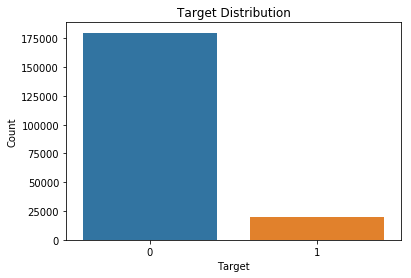

In [5]:
train_df["target"].value_counts()/train_df.shape[0]*100
fig,ax= plt.subplots()
sns.countplot(data=train_df,x="target",ax=ax)
ax.set(xlabel="Target",
       ylabel="Count", 
       Title = "Target Distribution"
       )

Looking at output of describe for both df, data seems to be similar in both the datasets (test and train).  Another point is test is of same size as train. we need to find a way to extract some info from test data.

### Missing values

None of dataset has any missing values. 

In [6]:
train_df.isnull().sum().sum()
test_df.isnull().sum().sum()

0

0

<div id="FuncLink">
** Utility Functions for EDA and Feature Engineering **
    </div>

To plot distributions features of two datasets  **plot_feature_distribution**

In [7]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

To plot boxplot of features of two datasets, along with class split  **plot_feature_boxplot**

In [8]:
def plot_feature_boxplot(df1,df2,label1,label2,features,target):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(100,2,figsize=(10,180))

    for feature in features:
        i += 1
        plt.subplot(100,2,i)
        sns.boxplot(y=df1[feature], x=target, showfliers=False)
        plt.title(feature+'_train', fontsize=10)
        plt.ylabel('')
        plt.xlabel('')
        i += 1
        plt.subplot(100,2,i)
        sns.boxplot(df2[feature],orient='v',color='r')
        plt.title(feature+'_test', fontsize=10)
        plt.ylabel('')
        plt.xlabel('')

        #locs, labels = plt.xticks()
        #plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        #plt.tick_params(axis='y', which='major', labelsize=6)
        #plt.gca().axes.get_xaxis().set_visible(False)
        #plt.gca().axes.get_yaxis().set_visible(False)
    plt.tight_layout()  
    plt.show();
    
    

To plot violinplot of features of two datasets, along with class split  **plot_feature_violinplot**

In [9]:
def plot_feature_violinplot(df1,df2,label1,label2,features,target):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(100,2,figsize=(10,180))

    for feature in features:
        i += 1
        plt.subplot(100,2,i)
        sns.violinplot(y=df1[feature], x=target, showfliers=False)
        plt.title(feature+'_train', fontsize=10)
        plt.ylabel('')
        plt.xlabel('')
        i += 1
        plt.subplot(100,2,i)
        sns.violinplot(df2[feature],orient='v',color='r')
        plt.title(feature+'_test', fontsize=10)
        plt.ylabel('')
        plt.xlabel('')

        #locs, labels = plt.xticks()
        #plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        #plt.tick_params(axis='y', which='major', labelsize=6)
        #plt.gca().axes.get_xaxis().set_visible(False)
        #plt.gca().axes.get_yaxis().set_visible(False)
    plt.tight_layout()  
    plt.show();
    

To plot violinplot of binned features for training along with class split  **plot_binned_feature_target_violinplot**

In [10]:
def plot_binned_feature_target_violinplot(df,features,target):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(200,1,figsize=(8,380))

    for feature in features:
        bins = np.nanpercentile(df[feature], range(0,101,10))
        df[feature+"_binned"] = pd.cut(df[feature],bins=bins)
        i += 1
        plt.subplot(200,1,i)
        sns.violinplot(y=df[feature+"_binned"], x=target, showfliers=False)
        plt.title(feature+'_binned & Target', fontsize=12)
        plt.ylabel('')
        plt.xlabel('')
       
        locs, labels = plt.xticks()
        plt.xticks([0.0,1.0])
        plt.tick_params(axis='y', which='major', labelsize=8)
        #ax.set_xticks([0.15, 0.68, 0.97])
        #plt.gca().axes.get_xaxis().set_visible(False)
        #plt.gca().axes.get_yaxis().set_visible(False)
    plt.tight_layout()  
    plt.show();

To add new features row wise  **add_new_feature_row**

In [11]:
def add_new_feature_row(df,features):
    for feature in features:
        df[feature+"_pct"] = df[feature].pct_change()
        df[feature+"_diff"] = df[feature].diff()
        df.drop(feature,axis=1)
    return df
    

To normailize features using combined dataset **normalize_df**

In [12]:
def normalize_df(df,features):
    for feature in features:
        #normalize
        df[feature+'_norm'] = (df[feature] - df[feature].mean())/df[feature].std()
        #percentage change row wise
        #df[feature+"_pct"] = df[feature].pct_change() # didnt give boost
        #diff change row wise
        #df[feature+"_diff"] = df[feature].diff() # didnt give boost
        # Square
        #df[feature+'^2'] = df[feature] * df[feature]
        # Cube
        #df[feature+'^3'] = df[feature] * df[feature] * df[feature]
        # 4th power
        #df[feature+'^4'] = df[feature] * df[feature] * df[feature] * df[feature]
        # Cumulative percentile (not normalized)
        #df[feature+'_cp'] = rankdata(df[feature]).astype('float32')
        # Cumulative normal percentile
        #df[feature+'_cnp'] = norm.cdf(df[feature]).astype('float32')
    return df
    

Lets separate the dataset for positive and negative class and check if feature distributions give us some signal.Lift and shift from [Gabriel's](https://www.kaggle.com/gpreda/santander-eda-and-prediction) kernel.

<div id="PlotLink">
**Plotting**
    </div>

Distplot for 1-100 features

<Figure size 432x288 with 0 Axes>

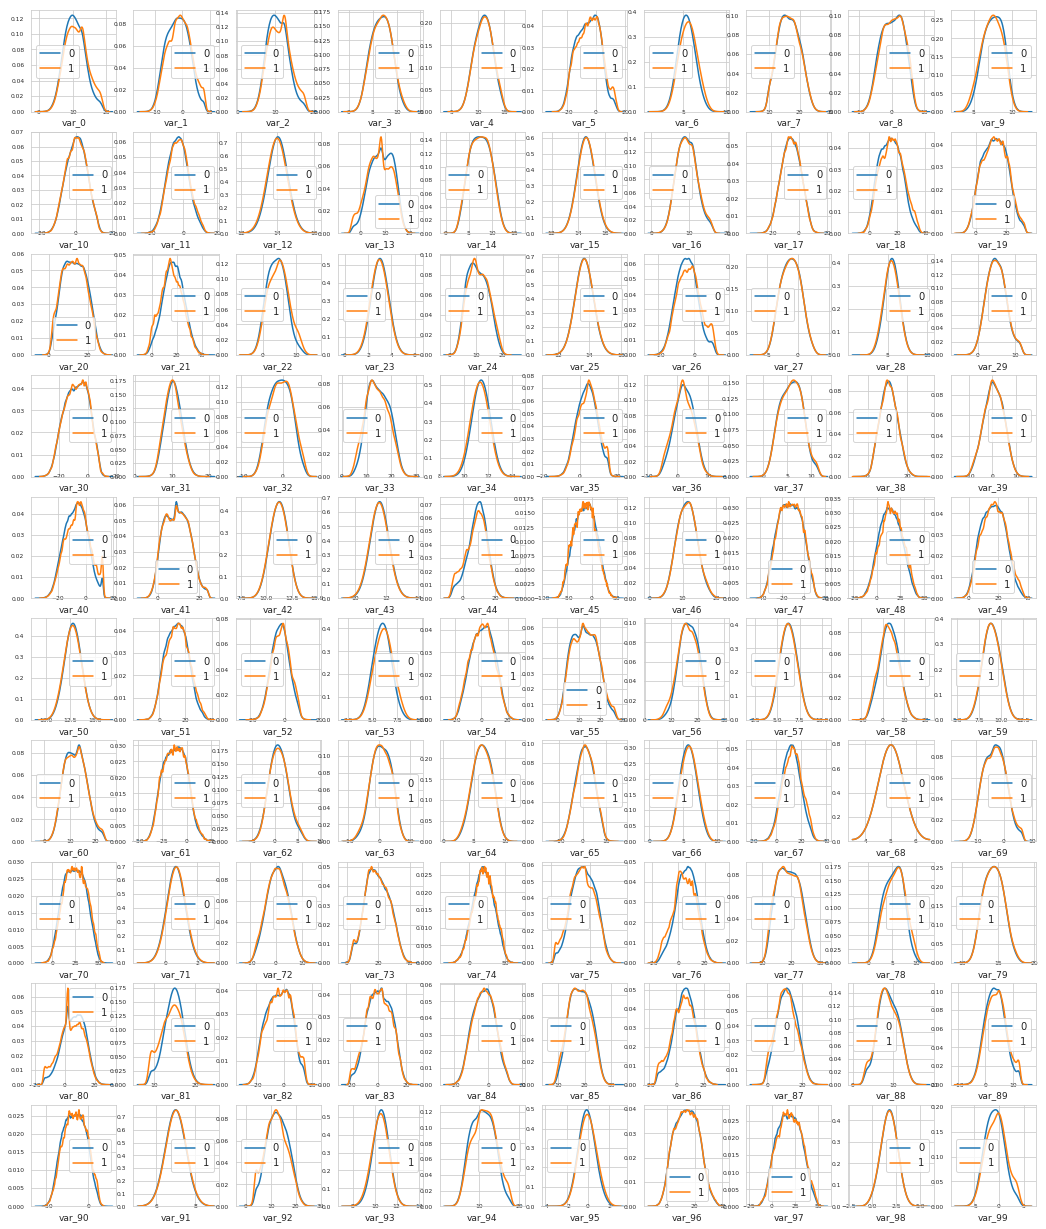

In [13]:
t0 = train_df.loc[train_df['target'] == 0] # segregate in two datasets correseponding to target
t1 = train_df.loc[train_df['target'] == 1]
features = train_df.columns.values[2:102] # run time errors forced this step to split into 100 sets
plot_feature_distribution(t0, t1, '0', '1', features)


Distplot for 100-200 features

<Figure size 432x288 with 0 Axes>

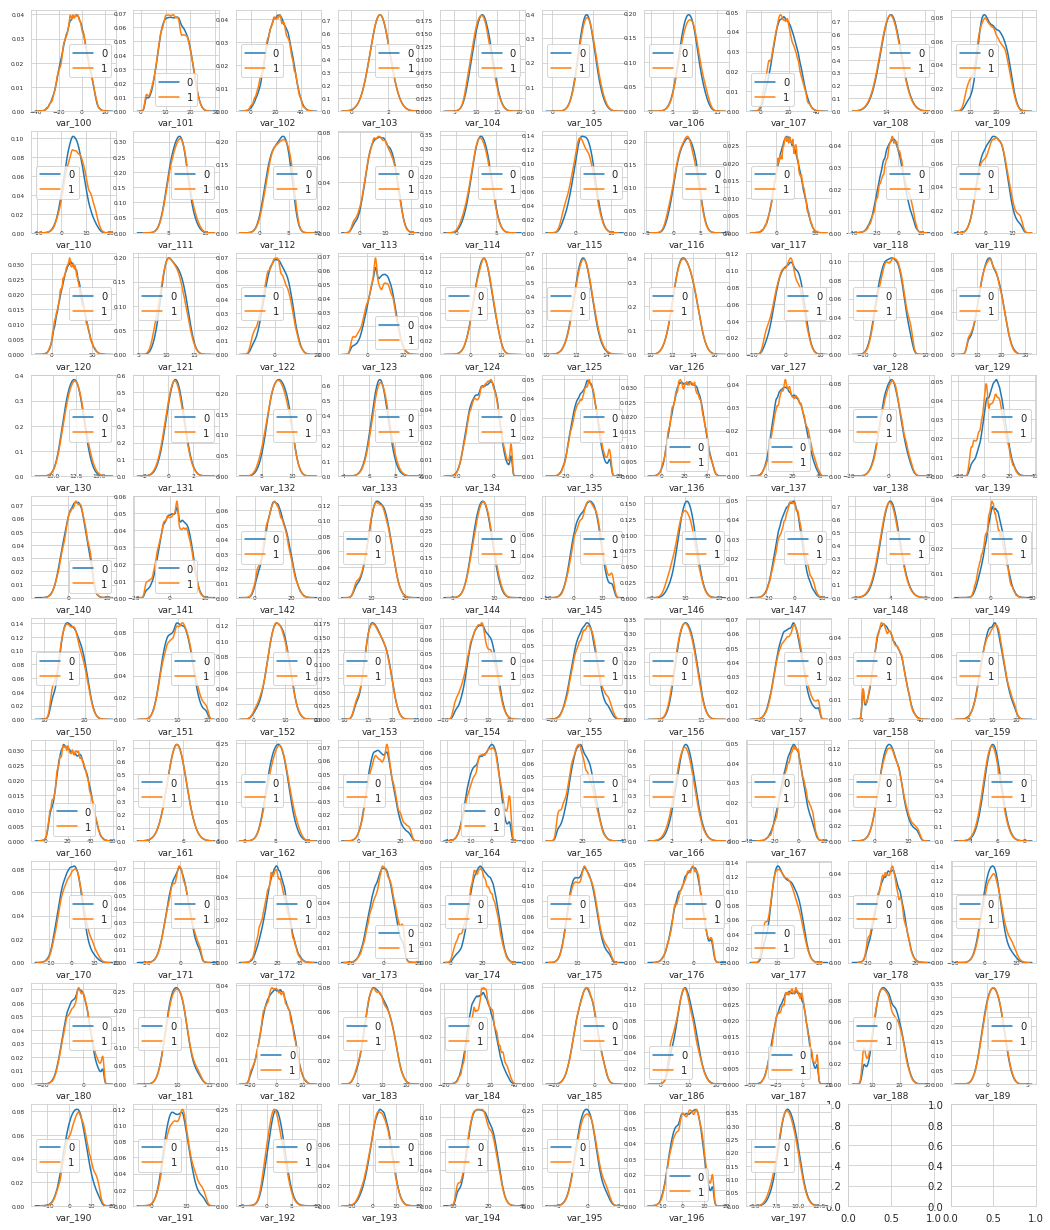

In [14]:
features = train_df.columns.values[102:200] 
plot_feature_distribution(t0, t1, '0', '1', features)

Lets see how the train and test features affects target. It may give some signal if some feature is more important for target prediction.

Boxplot 1-100 features

<Figure size 432x288 with 0 Axes>

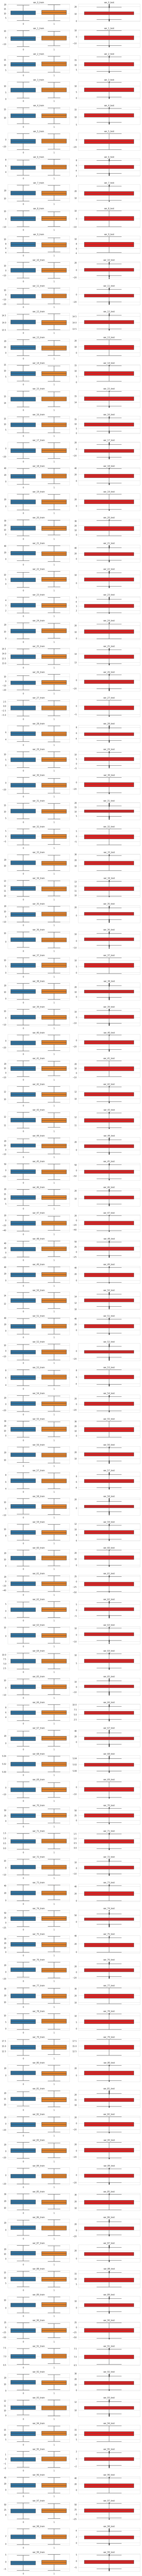

In [15]:
target   = train_df["target"]
features = train_df.columns.values[2:102]
plot_feature_boxplot(train_df, test_df, 'train', 'test', features, target)

Boxplot 100-200 features

<Figure size 432x288 with 0 Axes>

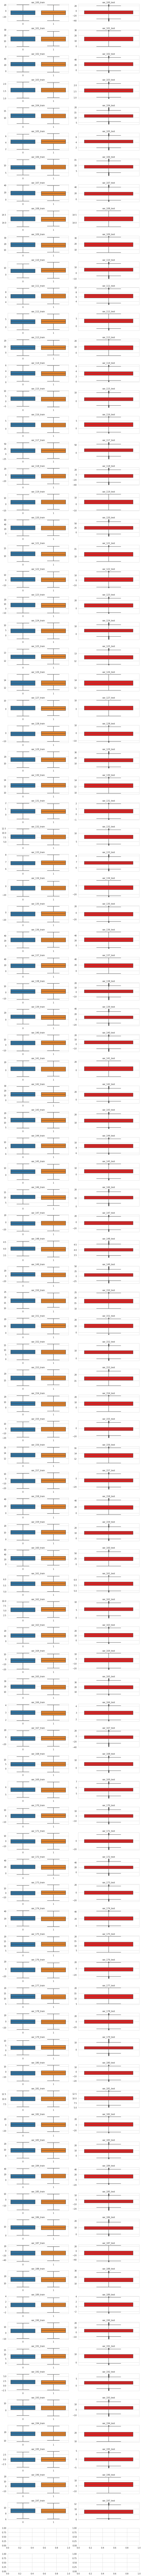

In [16]:
features = train_df.columns.values[102:200]
plot_feature_boxplot(train_df, test_df, 'train', 'test', features, target )

Violin Plot 1-100 features

<Figure size 432x288 with 0 Axes>

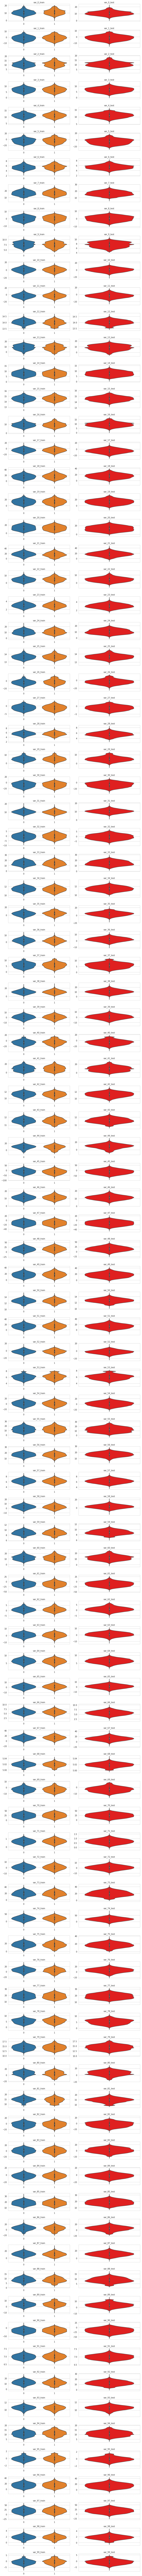

In [17]:
features = train_df.columns.values[2:102]
plot_feature_violinplot(train_df, test_df, 'train', 'test', features, target)

Violin Plot 100-200 features

<Figure size 432x288 with 0 Axes>

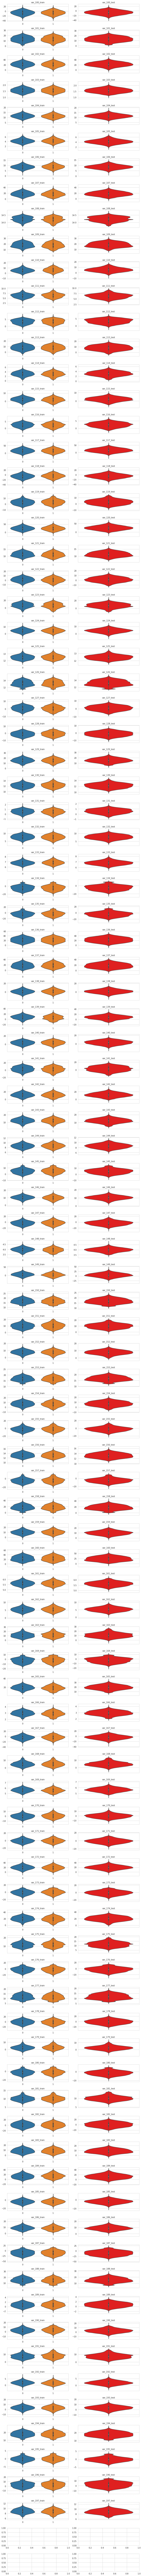

In [18]:
features = train_df.columns.values[102:200]
plot_feature_violinplot(train_df, test_df, 'train', 'test', features, target)

All these plots above shows data between train and test is very much similar and mostly normally distributed. We may be able to use test dataset for extracting some info assuming its homogeneous with train. 

<div id=CorLink>
** Correlation and Binning **
</div>

Lets find out corr between features, we may be able to drop couple of features if highly correlated. 

In [19]:
correlations = train_df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index() #
correlations = correlations[correlations['level_0'] != correlations['level_1']] # remove corr between same cols


Highest correlation between top 10 features is as follows

In [20]:
#highest correlated features are
correlations.tail(10)

level_0  level_1         0
9496  var_193  var_172  0.008163
9497  var_172  var_193  0.008163
9498  var_127  var_162  0.008555
9499  var_162  var_127  0.008555
9500  var_132  var_122  0.008956
9501  var_122  var_132  0.008956
9502  var_146  var_169  0.009071
9503  var_169  var_146  0.009071
9504  var_183  var_189  0.009359
9505  var_189  var_183  0.009359

<Figure size 432x288 with 0 Axes>

Text(0.5,86.0938,'')

Text(68.0938,0.5,'')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text xticklabel objects>)

Text(0.5,1,'Corr plot between top 25 vars')

<Figure size 432x288 with 0 Axes>

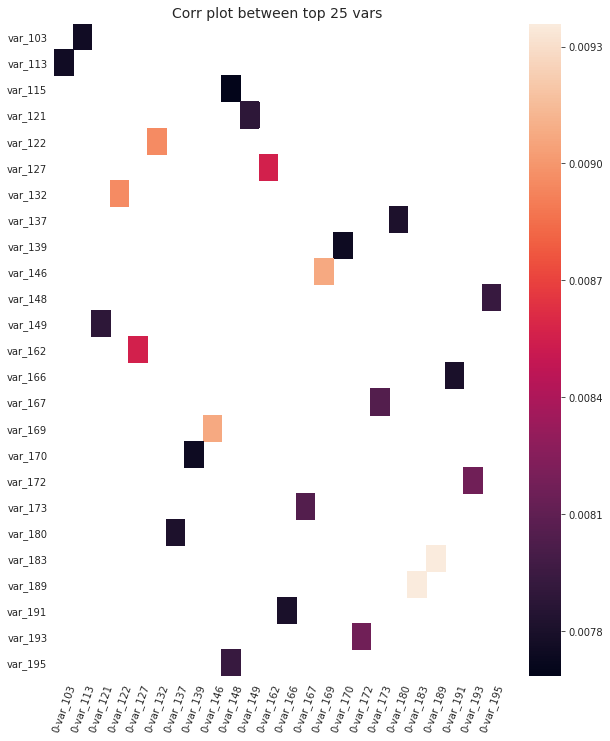

In [21]:
correlations = correlations.iloc[-25:,]
plt.figure()
fig, ax = plt.subplots(figsize=(10,12))
sns.heatmap(correlations.pivot_table(index='level_0',columns='level_1'))
plt.xlabel("")
plt.ylabel("")
#plt.xticks([], [])
#plt.yticks([], [])
plt.xticks(rotation=70)
plt.title("Corr plot between top 25 vars",fontsize=14)
plt.show()

Correlation plot also shows not relation between features, looks to be pretty independent of each other.

### Binning

lets try to find if binning of the features shows some trend for predicting target. We will use consistent pattern of using aa utility function and calling with 100 features in one call. 

In [22]:
#features = train_df.columns.values[2:102]
#plot_binned_feature_target_violinplot(train_df,features,target)

In [23]:
#features = train_df.columns.values[102:200]
#plot_binned_feature_target_violinplot(train_df,features,target)

Binning plots also does not show any different story. 

In [24]:
import gc
gc.collect()

551834

<div id = FeatLink>
** Feature Engineering **
    </div>

Lets try to find if data is some sort of time series data. as one of the post was doubting. We will try to add features which will be row wise, like percentage increase from one row to next, difference from one row to next, ratio etc.

Next we are going to combine is two data sets and try to extract some info from test dataset into train features. This idea is from [William's](https://www.kaggle.com/blackblitz/gaussian-naive-bayes) kernel. Wel will create a ratio /pct_change/diff as new features to factor for time series hypothesis.

In [25]:
test_df['target']= np.nan
combine_df = train_df.append(test_df,ignore_index=True)

In [26]:
features = train_df.columns.values[2:]
combine_df = normalize_df(combine_df,features)

Separate out train and test. Append new features created to training dataset.

In [27]:
train_df = combine_df[combine_df['target'].notnull()].reset_index(drop=True)
test_df = combine_df[combine_df['target'].isnull()].reset_index(drop=True)


Plot selectively if new any new features give some insight for target prediction.

In [28]:
#features = train_df.columns.values[201:]
#plot_binned_feature_target_violinplot(train_df,features,target)

<div id = ModLink>
** Modeling **
    </div>

This is model lifted and shifted from [Fayaz's](https://www.kaggle.com/fayzur/lightgbm-customer-transaction-prediction) kernel.

In [29]:
#test_df = test_df.drop("target",axis=1)
predictors = train_df.columns.values.tolist()[2:]
nfold = 10
target = 'target'

In [30]:
param = {
     'num_leaves': 18,
     'max_bin': 63,
     'min_data_in_leaf': 5,
     'learning_rate': 0.010614430970330217,
     'min_sum_hessian_in_leaf': 0.0093586657313989123,
     'feature_fraction': 0.056701788569420042,
     'lambda_l1': 0.060222413158420585,
     'lambda_l2': 4.6580550589317573,
     'min_gain_to_split': 0.29588543202055562,
     'max_depth': 49,
     'save_binary': True,
     'seed': 1337,
     'feature_fraction_seed': 1337,
     'bagging_seed': 1337,
     'drop_seed': 1337,
     'data_random_seed': 1337,
     'objective': 'binary',
     'boosting_type': 'gbdt',
     'verbose': 1,
     'metric': 'auc',
     'is_unbalance': True,
     'boost_from_average': False
}


nfold = 10

skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=42)

oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

i = 1
for train_index, valid_index in skf.split(train_df, train_df.target.values):
    print("\nfold {}".format(i))
    xg_train = lgb.Dataset(train_df.iloc[train_index][predictors].values,
                           label=train_df.iloc[train_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False
                           )
    #print("after lgb train")
    xg_valid = lgb.Dataset(train_df.iloc[valid_index][predictors].values,
                           label=train_df.iloc[valid_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False
                           )   
    #print("after lgb test")
    nround = 8523
    clf = lgb.train(param, 
                    xg_train, 
                    nround, 
                    valid_sets = [xg_valid], 
                    early_stopping_rounds=250,
                    verbose_eval=250)
    oof[valid_index] = clf.predict(train_df.iloc[valid_index][predictors].values, num_iteration=nround) 
    #print("after lgb fit")
    predictions += clf.predict(test_df[predictors], num_iteration=nround) / nfold
    i = i + 1

print("\n\nCV AUC: {:<0.4f}".format(metrics.roc_auc_score(train_df.target.values, oof)))


fold 1
Training until validation scores don't improve for 250 rounds.
[250]	valid_0's auc: 0.856718
[500]	valid_0's auc: 0.864392
[750]	valid_0's auc: 0.869472
[1000]	valid_0's auc: 0.874933
[1250]	valid_0's auc: 0.879313
[1500]	valid_0's auc: 0.882967
[1750]	valid_0's auc: 0.885994
[2000]	valid_0's auc: 0.888412
[2250]	valid_0's auc: 0.890313
[2500]	valid_0's auc: 0.89181
[2750]	valid_0's auc: 0.893164
[3000]	valid_0's auc: 0.894156
[3250]	valid_0's auc: 0.89497
[3500]	valid_0's auc: 0.89574
[3750]	valid_0's auc: 0.896326
[4000]	valid_0's auc: 0.896809
[4250]	valid_0's auc: 0.897195
[4500]	valid_0's auc: 0.897567
[4750]	valid_0's auc: 0.89789
[5000]	valid_0's auc: 0.898167
[5250]	valid_0's auc: 0.898329
[5500]	valid_0's auc: 0.898446
[5750]	valid_0's auc: 0.898494
[6000]	valid_0's auc: 0.898594
[6250]	valid_0's auc: 0.89863
[6500]	valid_0's auc: 0.898654
[6750]	valid_0's auc: 0.898664
[7000]	valid_0's auc: 0.898713
[7250]	valid_0's auc: 0.898768
[7500]	valid_0's auc: 0.898803
Early s

Feature Importance as per model

Text(0.5,1,'LightGBM - Feature Importance')

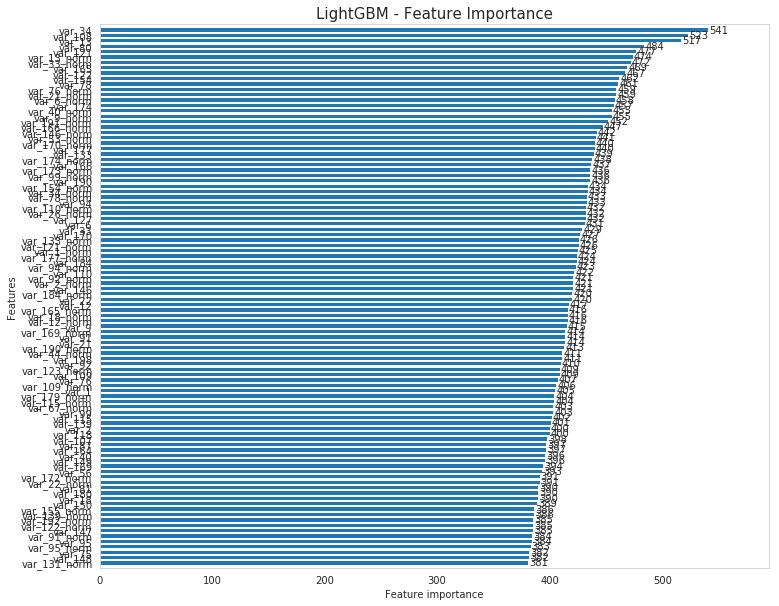

In [31]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(clf, max_num_features=100, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

Submission file

In [32]:
sub_df = pd.DataFrame({"ID_code": test_df.ID_code.values})
sub_df["target"] = predictions
sub_df.to_csv("sant_lgb.csv", index=False)
sub_df[:10]

ID_code    target
0  test_0  0.385011
1  test_1  0.646007
2  test_2  0.639735
3  test_3  0.638631
4  test_4  0.245383
5  test_5  0.009012
6  test_6  0.040399
7  test_7  0.581054
8  test_8  0.015102
9  test_9  0.039963